In [1]:
import os

import numpy  as np
import pandas as pd

import matplotlib.pyplot as plt


import tensorflow as tf

# Colors using scheme
c = ["#" + i for i  in "264653-2a9d8f-e9c46a-f4a261-e76f51".split("-")]

2022-01-13 06:20:16.867130: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-01-13 06:20:16.867189: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


## Load and Investigate the Data

In [2]:
data_trace_high = pd.read_csv("/mnt/c/Users/johan/Desktop/CMT_project/data/traces_high.txt", sep = " ", header = None)
data_trace_low  = pd.read_csv("/mnt/c/Users/johan/Desktop/CMT_project/data/traces_low.txt",  sep = " ", header = None)

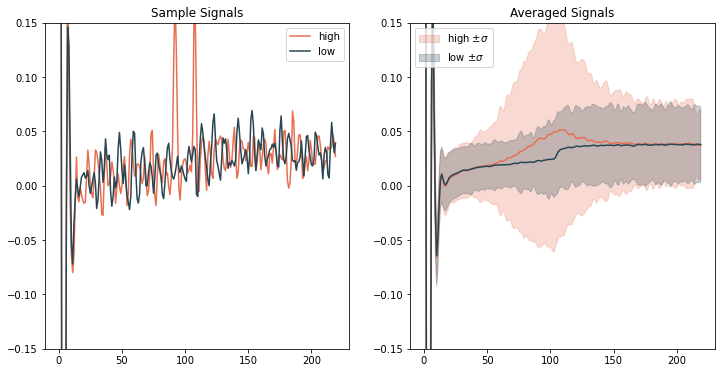

In [3]:
# Real time comparison
common_x = np.arange(data_trace_high.shape[1])

# Check sample plots and the average
fig, (ax, ax_mean) = plt.subplots(figsize = (12, 6), ncols = 2)

ax.plot(data_trace_high.iloc[0, :], label = "high", c = c[-1])
ax.plot(data_trace_low.iloc[0, :],  label = "low",  c = c[0])

ax.set( ylim  = (-0.15, 0.15),
        title = "Sample Signals")

high_mean = data_trace_high.mean()
high_std  = data_trace_high.std()

low_mean  = data_trace_low.mean()
low_std   = data_trace_low.std()


ax_mean.plot(common_x, high_mean, c = c[-1])
ax_mean.plot(common_x, low_mean,  c = c[0])

ax_mean.fill_between(common_x, high_mean - high_std, high_mean + high_std, color = c[-1], alpha = 0.25, label = r"high $\pm \sigma$")
ax_mean.fill_between(common_x, low_mean  - low_std,  low_mean  + low_std,  color = c[0],  alpha = 0.25, label = r"low $\pm \sigma$ ")

ax_mean.set(ylim  = (-0.15, 0.15),
            title = "Averaged Signals")

ax.legend(loc = "upper right")
ax_mean.legend(loc = "upper left")

We can repeat this after applying fourier transformation, since we will primarily be looking at time-differences since the physics is expected to be in relative time and not the absolute:

In [4]:
fft_trace_high = np.fft.rfft(data_trace_high)
fft_trace_low  = np.fft.rfft(data_trace_low )

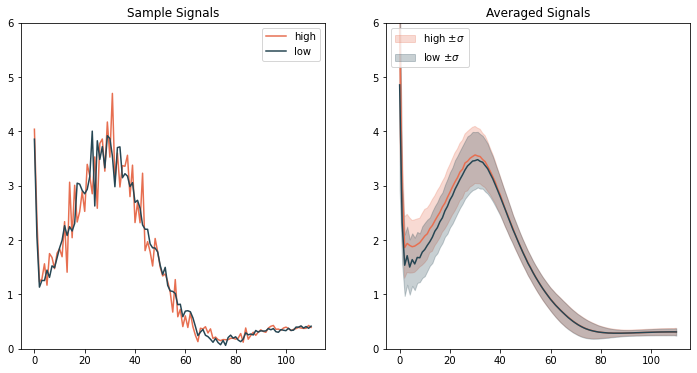

In [5]:
# Fourier space comparison
common_w = np.arange(fft_trace_high.shape[1])

# Check sample plots and the average
fig, (ax, ax_mean) = plt.subplots(figsize = (12, 6), ncols = 2)

ax.plot(abs(fft_trace_high)[0, :], label = "high", c = c[-1])
ax.plot(abs(fft_trace_low)[0, :],  label = "low",  c = c[0])

ax.set( ylim  = (0, 6),
        title = "Sample Signals")

high_mean = abs(fft_trace_high).mean(0)
high_std  = abs(fft_trace_low).std(0)

low_mean  = abs(fft_trace_low).mean(0)
low_std   = abs(fft_trace_low).std(0)


ax_mean.plot(common_w, high_mean, c = c[-1])
ax_mean.plot(common_w, low_mean,  c = c[0])

ax_mean.fill_between(common_w, high_mean - high_std, high_mean + high_std, color = c[-1], alpha = 0.25, label = r"high $\pm \sigma$")
ax_mean.fill_between(common_w, low_mean  - low_std,  low_mean  + low_std,  color = c[0],  alpha = 0.25, label = r"low $\pm \sigma$ ")

ax_mean.set(ylim  = (0, 6),
            title = "Averaged Signals")

ax.legend(loc = "upper right")
ax_mean.legend(loc = "upper left")

## Dimensionality Reduction
We use UMAP to make some dimensional reduction plots. We're gonig to make __X__ different plots.

We're going to pursue the following:
- Real time simple distance UMAP 
- Fourier transformed UMAP

In [20]:
import umap
from sklearn.model_selection import train_test_split

First we generate labels and a collective dataset:

In [18]:
rand_seed  = 1969
test_split = 0.2


high_labels = np.ones(data_trace_high.shape[0])
low_labels  = np.zeros(data_trace_low.shape[0])

data        = pd.concat([data_trace_high, data_trace_low])
labels      = np.concatenate([high_labels,     low_labels])


X_train, X_test, Y_train, Y_test = train_test_split(data, labels, test_size = test_split)

And we setup a figure to collect the different plots:

Text(0.5, 0.98, 'Different UMAP reductions')

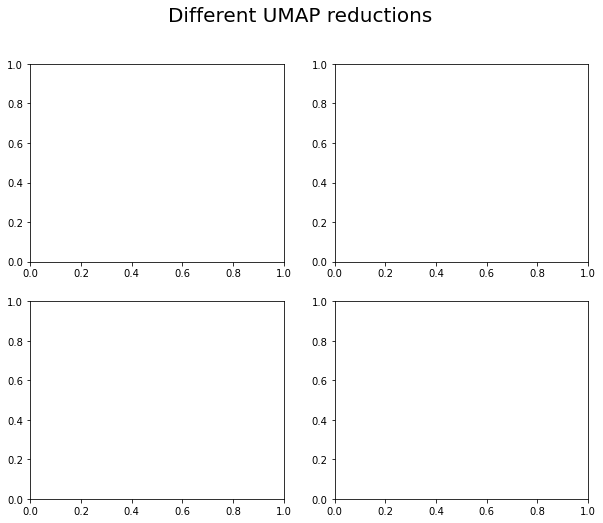

In [23]:
fig, axes = plt.subplots(figsize = (10, 8), ncols = 2, nrows = 2, )
fig.suptitle("Different UMAP reductions", fontsize = 20)

### Real Time - Euclidean Distance
Pretty much straight out of the box approach 

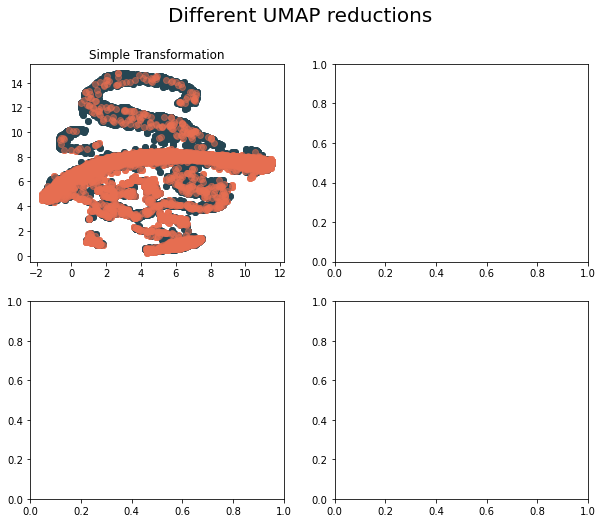

In [30]:
reducer_simple   = umap.UMAP(random_state = rand_seed)
embedding_simple = reducer_simple.fit_transform(X_train)

axes[0, 0].scatter(embedding_simple[:, 0][Y_train == 1], embedding_simple[:, 1][Y_train == 1], color = c[0],  label = "high", alpha = 0.5)
axes[0, 0].scatter(embedding_simple[:, 0][Y_train == 0], embedding_simple[:, 1][Y_train == 0], color = c[-1], label = "low" , alpha = 0.5)

axes[0, 0].set(title = "Simple Transformation")
fig

### Fourier Space

In [31]:
X_train_fft = abs(np.fft.rfft(X_train))

reducer_fft = umap.UMAP(random_state = rand_seed)
embedding_simple_fft = reducer_fft.fit_transform(X_train_fft)

axes[0, 1].scatter(embedding_simple_fft[:, 0][Y_train == 1], embedding_simple_fft[:, 1][Y_train == 1], color = c[0],  label = "high", alpha = 0.5)
axes[0, 1].scatter(embedding_simple_fft[:, 0][Y_train == 0], embedding_simple_fft[:, 1][Y_train == 0], color = c[-1], label = "low" , alpha = 0.5)

axes[0, 1].set(title = "Simple FFT Transformation")

[Text(0.5, 1.0, 'Simple Transformation')]

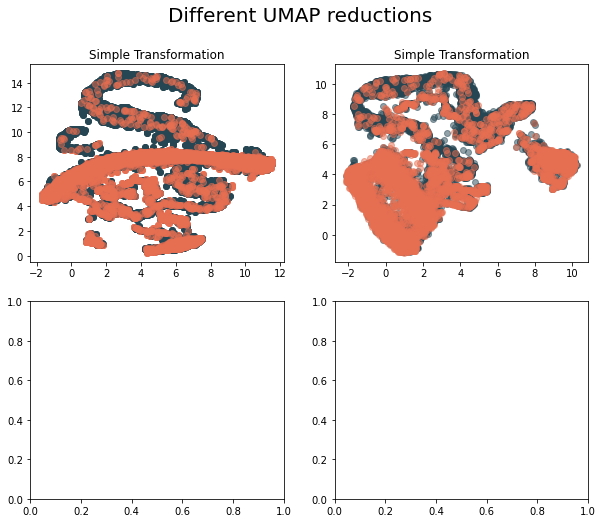

In [32]:
fig